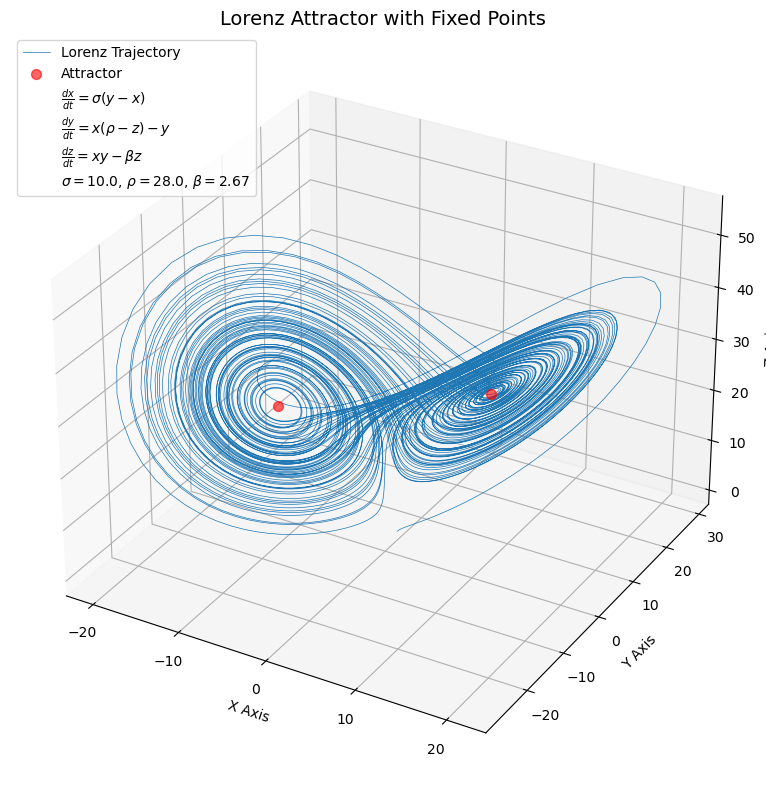

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

# Lorenz system parameters
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

# Time integration setup
dt = 0.01
steps = 10000

# State arrays
x = np.zeros(steps)
y = np.zeros(steps)
z = np.zeros(steps)
x[0], y[0], z[0] = 1.0, 1.0, 1.0

# Euler integration
for i in range(steps - 1):
    dx = sigma * (y[i] - x[i])
    dy = x[i] * (rho - z[i]) - y[i]
    dz = x[i] * y[i] - beta * z[i]

    x[i+1] = x[i] + dx * dt
    y[i+1] = y[i] + dy * dt
    z[i+1] = z[i] + dz * dt

# Fixed points
x_fp = np.sqrt(beta * (rho - 1))
z_fp = rho - 1
attractors = [(x_fp, x_fp, z_fp), (-x_fp, -x_fp, z_fp)]

# 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

traj_plot, = ax.plot(x, y, z, lw=0.5, color='black', label='Trajectory')

# Attractors
for pt in attractors:
    ax.scatter(*pt, color='red', s=50, alpha=0.7)

# Equation legend entry (fake handle)
eq_label = (
    r"$\frac{dx}{dt} = \sigma(y - x)$" "\n"
    r"$\frac{dy}{dt} = x(\rho - z) - y$" "\n"
    r"$\frac{dz}{dt} = xy - \beta z$" "\n"
    f"$\\sigma = {sigma}$, $\\rho = {rho}$, $\\beta = {beta:.2f}$"
)
equation_handle = Line2D([0], [0], linestyle="none", label=eq_label)

# Legend
ax.legend(handles=[traj_plot, equation_handle], loc='upper left', fontsize=10)

# Labels
ax.set_title("Lorenz Attractor and Symmetric Fixed Points", fontsize=14)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.tight_layout()
plt.savefig("lorenz_attractor.pdf")
plt.show()
